<a href="https://colab.research.google.com/github/bharatbajoria/Summer-Internship/blob/master/Topic_Modelling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PDF Reading

In [99]:
pip install pyPDF2

In [0]:
import PyPDF2

In [0]:
#Taking file input
#number of files
nf=2

file= open('Apr-18.PDF','rb')
file1= open('Apr-17.PDF','rb')
  

In [0]:
#A list of files
file_list=[file,file1]

In [0]:
# Reading number of pages
pages=[]

for i in range(nf):
  pdfReader = PyPDF2.PdfFileReader(file_list[i])
  n1=pdfReader.numPages
  pages.append(n1)

In [0]:
# A list containing all files, All_Docs[i] is i-th file 
# All_Docs[i][j] is j-th page of i-th file
All_Docs=[] 

In [0]:

for j in range(nf):
  pdfReader = PyPDF2.PdfFileReader(file_list[j])
  file_text=[] #takes string of page text
  for i in range(pages[j]):
    pageObj = pdfReader.getPage(i)
    a=pageObj.extractText()
    file_text.append(a)
  
  All_Docs.append(file_text)

In [106]:
type(All_Docs[0][1]),type(All_Docs[0])

(str, list)

# Finding Optimal number of Clusters

In [0]:
Dup_All_Docs=All_Docs[:]

In [108]:
type(Dup_All_Docs[0][0])

str

In [0]:
import nltk
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

import pandas as pd
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from nltk.corpus import stopwords
import gensim

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

In [110]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
en_stop.add('the')#The is not in stopwords

In [0]:
tokens=[]


for j in All_Docs:
  x=[]
  for i in j:
    token=tokenizer.tokenize(i)
    token=[i for i in token if(not(str(i).isdigit() or not(str(i).isalpha())) and len(str(i)) > 2 )]
    token=[i.lower() for i in token if( i not in en_stop)]
    x.extend(token)
  
  tokens.extend(x)

In [113]:
len(tokens),tokens[:10]

(7941,
 ['press',
  'release',
  'department',
  'communication',
  'central',
  'office',
  'marg',
  'mumbai',
  'phone',
  'fax'])

In [0]:
#df9['Cleaned_PaperText'] = pd.Series(tokens)
        
vectorizer = TfidfVectorizer()

Y = vectorizer.fit_transform(tokens)

In [0]:
#Not Working

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Y)
    kmeanModel.fit(Y)
   # distortions.append(sum(np.min(cdist(Y, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

In [116]:
#2nd Method using Silhouette Score

n=0
ss=0
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(Y)
    label = kmeans.labels_
    sil_coeff = silhouette_score(Y, label, metric='euclidean')  
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    if sil_coeff>ss:
      ss=sil_coeff
      n=n_cluster

For n_clusters=2, The Silhouette Coefficient is 0.026380620853574482
For n_clusters=3, The Silhouette Coefficient is 0.03686542860742648
For n_clusters=4, The Silhouette Coefficient is 0.030661097063799957
For n_clusters=5, The Silhouette Coefficient is 0.030790414150609416
For n_clusters=6, The Silhouette Coefficient is 0.04936232804735082
For n_clusters=7, The Silhouette Coefficient is 0.06737013596051161
For n_clusters=8, The Silhouette Coefficient is 0.063763173371315
For n_clusters=9, The Silhouette Coefficient is 0.05631845571083558
For n_clusters=10, The Silhouette Coefficient is 0.07731321878050758


In [117]:
print("Optimal numbers of clusters are : {}".format(n))

Optimal numbers of clusters are : 10


# LDA

In [0]:

import nltk
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models import TfidfModel,LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
import matplotlib.pyplot as plt


In [119]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:

dictionary=Dictionary([[i] for i in tokens])

In [121]:
print(dictionary)

Dictionary(2065 unique tokens: ['press', 'release', 'department', 'communication', 'central']...)


In [122]:
X=[dictionary.doc2bow([sents]) for sents in tokens]#getting bag of words.
tfidf=TfidfModel(X)

print(type(tfidf))
X=tfidf[X]


<class 'gensim.models.tfidfmodel.TfidfModel'>


In [0]:
from gensim.models import LdaMulticore,CoherenceModel

lda=LdaMulticore(X,num_topics=n,id2word=dictionary,workers=8)
lda1=LdaModel(X,num_topics=n,id2word=dictionary,update_every=5)

#lda.print_topics()

In [124]:

ldatopics = [[(word,prob) for word, prob in topic] for topicid, topic in lda.show_topics(formatted=False)]
lda.show_topics(formatted=True)

[(0,
  '0.032*"impact" + 0.026*"cent" + 0.022*"fuel" + 0.021*"months" + 0.018*"rate" + 0.013*"manufacturing" + 0.011*"statement" + 0.011*"domestic" + 0.011*"survey" + 0.010*"central"'),
 (1,
  '0.045*"prices" + 0.030*"growth" + 0.030*"food" + 0.016*"target" + 0.016*"production" + 0.014*"expectations" + 0.013*"term" + 0.011*"reserve" + 0.011*"consumption" + 0.011*"monetary"'),
 (2,
  '0.063*"per" + 0.027*"the" + 0.022*"prices" + 0.013*"meeting" + 0.013*"half" + 0.012*"activity" + 0.011*"mpc" + 0.009*"global" + 0.009*"banks" + 0.009*"since"'),
 (3,
  '0.079*"inflation" + 0.042*"year" + 0.035*"the" + 0.016*"output" + 0.015*"liquidity" + 0.015*"january" + 0.012*"monetary" + 0.012*"level" + 0.012*"markets" + 0.011*"pmi"'),
 (4,
  '0.024*"effects" + 0.018*"the" + 0.016*"due" + 0.015*"april" + 0.011*"also" + 0.011*"second" + 0.010*"monsoon" + 0.010*"however" + 0.010*"conditions" + 0.009*"gst"'),
 (5,
  '0.028*"growth" + 0.027*"expected" + 0.018*"month" + 0.016*"food" + 0.013*"second" + 0.013*

# LSI HDP

In [0]:
lsi=  LsiModel(corpus=X, num_topics=n, id2word=dictionary)
hdp=  HdpModel(corpus=X, id2word=dictionary)

In [126]:
lsi_words=[topic for topicid, topic in  lsi.show_topics() ]
lsi_words

['-1.000*"inflation" + -0.000*"well" + -0.000*"volatility" + -0.000*"there" + 0.000*"round" + 0.000*"remained" + 0.000*"remain" + -0.000*"current" + 0.000*"low" + -0.000*"deficit"',
 '-1.000*"the" + -0.002*"around" + -0.001*"remains" + -0.001*"this" + -0.001*"points" + -0.001*"account" + 0.001*"lower" + -0.001*"path" + 0.001*"section" + 0.001*"resolution"',
 '1.000*"per" + 0.003*"well" + -0.002*"term" + -0.002*"conditions" + -0.002*"government" + 0.002*"medium" + 0.002*"manufacturing" + 0.002*"however" + 0.002*"demonetisation" + -0.002*"released"',
 '-1.000*"cent" + 0.002*"growth" + 0.002*"demonetisation" + 0.002*"round" + 0.002*"although" + 0.002*"fiscal" + 0.002*"points" + 0.002*"survey" + -0.002*"implementation" + -0.002*"ahead"',
 '1.000*"growth" + -0.002*"macroeconomic" + 0.002*"repo" + 0.002*"medium" + -0.002*"around" + 0.002*"cent" + 0.002*"well" + 0.002*"half" + 0.002*"prices" + -0.002*"capital"',
 '-1.000*"prices" + -0.003*"demonetisation" + 0.003*"conditions" + -0.002*"centra

In [127]:
hdp_words=[topic for topicid, topic in  lsi.show_topics() ]
hdp_words

['-1.000*"inflation" + -0.000*"well" + -0.000*"volatility" + -0.000*"there" + 0.000*"round" + 0.000*"remained" + 0.000*"remain" + -0.000*"current" + 0.000*"low" + -0.000*"deficit"',
 '-1.000*"the" + -0.002*"around" + -0.001*"remains" + -0.001*"this" + -0.001*"points" + -0.001*"account" + 0.001*"lower" + -0.001*"path" + 0.001*"section" + 0.001*"resolution"',
 '1.000*"per" + 0.003*"well" + -0.002*"term" + -0.002*"conditions" + -0.002*"government" + 0.002*"medium" + 0.002*"manufacturing" + 0.002*"however" + 0.002*"demonetisation" + -0.002*"released"',
 '-1.000*"cent" + 0.002*"growth" + 0.002*"demonetisation" + 0.002*"round" + 0.002*"although" + 0.002*"fiscal" + 0.002*"points" + 0.002*"survey" + -0.002*"implementation" + -0.002*"ahead"',
 '1.000*"growth" + -0.002*"macroeconomic" + 0.002*"repo" + 0.002*"medium" + -0.002*"around" + 0.002*"cent" + 0.002*"well" + 0.002*"half" + 0.002*"prices" + -0.002*"capital"',
 '-1.000*"prices" + -0.003*"demonetisation" + 0.003*"conditions" + -0.002*"centra

In [0]:

ldatopics_word = [[word for word, prob in topic] for topicid, topic in lda.show_topics(formatted=False)]


col=[]
a='Topic-'
c=''
for i in range(n):
  c+=a+str(i+1)
  col.append(c)
  c=''

len(col),len(ldatopics_word)

#topic_df=pd.DataFrame(data=ldatopics_word,columns=col)
topic_df=pd.DataFrame(data=ldatopics_word,index=col)

In [0]:
topic_df_T=topic_df.T

**Adding New File**

In [0]:

new_file=open('Apr-20.PDF','rb')
pdfReader = PyPDF2.PdfFileReader(new_file)
n1=pdfReader.numPages

new_file_pg=[]
for i in range(n1):
    pageObj = pdfReader.getPage(i)
    a=pageObj.extractText()
    new_file_pg.append(a)

#new_file_pg[:3]

In [0]:
new_token=[]
x=[]
for i in new_file_pg:
    token=tokenizer.tokenize(i)
    token=[i for i in token if(not(str(i).isdigit() or not(str(i).isalpha())) and len(str(i)) > 2 )]
    token=[i.lower() for i in token if( i not in en_stop)]
    x.extend(token)
  
    new_token.extend(x)


Z=[dictionary.doc2bow([sents]) for sents in new_token]

In [0]:
newlda=lda1[Z]


In [134]:
len(Z)

32176

In [0]:
new_topic=[]
for topic in newlda:
  #new_topic.append(prob)
  new_topic.append(topic)

In [136]:
len(new_topic),type(new_topic[0])#,new_topic[:2]

(32176, list)

In [137]:
lda1.get_document_topics(Z,per_word_topics=True)

# Evaluating Model: Topic Wise


In [0]:
tk=[[i] for i in tokens]
ldatopics = [[word for word, prob in topic] for topicid, topic in lda.show_topics(formatted=False)]
lda_coherence = CoherenceModel(topics=ldatopics, texts=tk, dictionary=dictionary, window_size=10).get_coherence()
#lda_coherence

In [0]:

tk=[[i] for i in tokens]
lsitopics = [[word for word, prob in topic] for topicid, topic in lsi.show_topics(formatted=False)]
hdptopics = [[word for word, prob in topic] for topicid, topic in hdp.show_topics(formatted=False)]

for i in range(n):
  lda=LdaMulticore(X,num_topics=n,id2word=dictionary,workers=8)
  ldatopics = [[word for word, prob in topic] for topicid, topic in lda.show_topics(formatted=False)]
  lda_coherence = CoherenceModel(topics=ldatopics, texts=tk, dictionary=dictionary, window_size=10).get_coherence()
  #coherence_score.append(lda_coherence)



Coherence Score

In [140]:
coherence_score=[]

lda_coherence = CoherenceModel(topics=ldatopics, texts=tk, dictionary=dictionary, window_size=10).get_coherence()
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=tk, dictionary=dictionary, window_size=10).get_coherence()
hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=tk, dictionary=dictionary, window_size=10).get_coherence()


coherence_score.append(lda_coherence)
coherence_score.append(lsi_coherence)
coherence_score.append(hdp_coherence)

coherence_score

[0.7094154268094115, 0.7103908796905253, 0.8189681871956968]

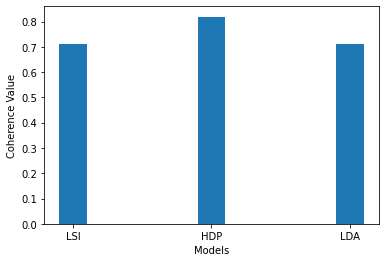

In [141]:


def evaluate_bar_graph(coherences, indices):
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')



evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])


In [142]:
best_score=max(coherence_score)
i=coherence_score.index(best_score)
i

if i==0:
  print("Best Model is LDA")
  hdptopics = [[word for word, prob in topic] for topicid, topic in lda.show_topics(formatted=False)]
  col=[]
  a='Topic'
  for i in range(len(hdptopics)):
    col.append(a+str(i+1))
  topic_df=pd.DataFrame(data=hdptopics,index=col)
  topic_df_T=topic_df.T
  

if i==1 :
  print("Best Model is LSI")
  hdptopics = [[word for word, prob in topic] for topicid, topic in lsi.show_topics(formatted=False)]
  col=[]
  a='Topic'
  for i in range(len(hdptopics)):
    col.append(a+str(i+1))
  
  topic_df=pd.DataFrame(data=hdptopics,index=col)
  topic_df_T=topic_df.T
  

else:
  print("Best Model is HDP")
  hdptopics = [[word for word, prob in topic] for topicid, topic in hdp.show_topics(formatted=False)]
  col=[]
  a='Topic'
  for i in range(len(hdptopics)):
    col.append(a+str(i+1))
  topic_df=pd.DataFrame(data=hdptopics,index=col)
  topic_df_T=topic_df.T
  

  


Best Model is HDP


In [143]:
topic_df_T.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20
0,mining,anticipating,reinforced,reducing,corporate,money,price,indications,profit,against,manner,nov,acc,transportation,for,preceding,lds,projection,confidence,firm
1,augurs,become,offset,direction,sheet,spike,purchasing,ated,institute,minimum,two,june,crops,percentage,therwise,easier,unacceptably,ingredients,dholakia,onducted
2,formation,etween,foodgrains,urgency,utilization,materialises,achieved,loaded,industries,nurtured,equity,issuances,depreciation,ceased,concern,statistic,decline,encouraging,labour,becoming
3,thereby,second,recession,react,substantial,patra,waivers,facilitated,stimulus,manager,launch,induced,specifics,cyclical,glo,persisted,telephone,latter,sheets,every
4,umer,good,flation,money,witnessed,exp,deteriorated,appears,met,invigorate,acc,etween,outcome,commitment,next,wide,restaurants,particularly,materialisation,gaining


# Evaluating Words in a Topic : Cosine scores.

In [0]:
Dup_All_Docs=All_Docs[0]+All_Docs[1]
df=[]

In [0]:
for j in All_Docs:
  for i in j:
    df.append(i)


In [146]:
len(All_Docs[0])

14

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectoriser = CountVectorizer().fit(Dup_All_Docs)
X = vectoriser.transform(Dup_All_Docs)
df_vec=pd.DataFrame(X.A, columns=sorted(vectoriser.vocabulary_.keys(), key=lambda k: vectoriser.vocabulary_[k]))

In [0]:
df_page=pd.DataFrame(data=Dup_All_Docs)
#df_page.head()

In [149]:
type(df),len(df)

(list, 26)

In [0]:
word_data=[]

for i in df:
    token=tokenizer.tokenize(i)
    token=[i for i in token if(not(str(i).isdigit() or not(str(i).isalpha())) and len(str(i)) > 2 )]
    token=[i.lower() for i in token if( i not in en_stop)]
    word_data.append(token)

In [0]:
model1 = gensim.models.Word2Vec(word_data, min_count = 1,size = 100, window = 5) 

In [152]:
topic_df_T

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20
0,mining,anticipating,reinforced,reducing,corporate,money,price,indications,profit,against,manner,nov,acc,transportation,for,preceding,lds,projection,confidence,firm
1,augurs,become,offset,direction,sheet,spike,purchasing,ated,institute,minimum,two,june,crops,percentage,therwise,easier,unacceptably,ingredients,dholakia,onducted
2,formation,etween,foodgrains,urgency,utilization,materialises,achieved,loaded,industries,nurtured,equity,issuances,depreciation,ceased,concern,statistic,decline,encouraging,labour,becoming
3,thereby,second,recession,react,substantial,patra,waivers,facilitated,stimulus,manager,launch,induced,specifics,cyclical,glo,persisted,telephone,latter,sheets,every
4,umer,good,flation,money,witnessed,exp,deteriorated,appears,met,invigorate,acc,etween,outcome,commitment,next,wide,restaurants,particularly,materialisation,gaining
5,released,ebbing,highest,additional,outcome,persistent,contributing,fed,strongly,number,soil,point,picture,link,evolve,mopping,resolving,refusing,consumers,group
6,perfect,surrounding,twin,trillion,evolve,retarding,somewhat,effective,iii,inflation,slowed,throughout,stock,said,macroeconomic,prospects,relatively,firewood,gva,range
7,productive,ﬁbalance,treasury,niño,ust,confront,albeit,effects,continuously,make,recovered,distinctly,ago,limit,necessary,communication,reading,volume,holdings,softeni
8,specifics,penetrate,clarity,yet,gradual,department,recommended,inf,vis,indian,firms,preceding,related,finished,advanced,sectors,iii,broad,officer,pectations
9,shore,future,administered,japanese,scenario,indicate,evidence,entire,rbi,crops,collections,december,integrated,nominated,consistently,spot,stabilised,universities,good,assessment


In [0]:
#ds2

Cosine Similarity Score

In [154]:
# List of topic wise words
ds=[]
for i in range(len(col)):
  ds.append(list(topic_df_T[col[i]]))

ds# ds[i] is i-th list of Topic-i

simscore_topic=[]#initiating mtx for sim scores/cosine scores


for p in range(len(ds)):
  k=len(ds[p])
  o=0

  sim=[]
  simt=[]
  
  for i in range(k):
    simt=[]
    for j in range(k)  :
      o=model1.similarity(ds[p][i],ds[p][j])
      simt.append(o)

    sim.append(simt)

  simscore_topic.append(sim)
# 3-D list, simscore_topic[i] is similarity scores for topic-i
# simscore_topic[i][j] is list of similarity score of j-th word in i-th Topic with other words




for j in range(len(ds)):
  for i in range(k-1):
    print(ds[j][i])
    print(simscore_topic[j][i])
    #print(model1.similarity(topic1[i],topic1[i+1]))
   

mining
[0.99999994, 0.14060208, -0.081275985, 0.09286903, 0.040151346, 0.07302488, 0.012929914, 0.08082679, -0.059315518, -0.067147665, 0.28265807, 0.08706198, 0.17653407, 0.08807301, -0.105805576, -0.012906264, -0.046769854, 0.015736662, 0.012474665, 0.2612666]
augurs
[0.14060208, 1.0, 0.13970856, -0.14725839, 0.05957656, -0.12283548, -0.018947465, -0.09472114, -0.14725809, 0.061253496, 0.04706427, 0.025313294, 0.12567143, 0.11806691, 0.059702914, 0.01598274, -0.09276842, 0.047945384, -0.041379724, 0.0035152035]
formation
[-0.081275985, 0.13970856, 0.99999994, -0.028694944, -0.13718048, 0.044315416, -0.1917313, 0.051616922, -0.119207956, -0.12750359, -0.09446475, 0.11470004, -0.11464976, 0.13455981, 0.06283345, 0.025352078, -0.04268918, -0.06283127, -0.022383709, -0.0914289]
thereby
[0.09286903, -0.14725839, -0.028694944, 1.0, -0.06259003, 0.108191125, -0.08798187, 0.009288297, 0.05461699, -0.17461571, 0.036272883, -0.11388592, -0.008784079, 0.17767322, 0.020844715, -0.13406995, 0.021

In [155]:
gbl = globals()


#df_topic_name = ['SymbolA','SymbolB', 'SymbolC' .... 'SymbolN']

for i in range(len(col)):   

   gbl[str('df')+col[i]] = pd.DataFrame(simscore_topic[i],index=ds[i],columns=ds[i])
   print("Similarity Scores matrix for Topic-{}".format(i+1))
   print(gbl[str('df')+col[i]])
   print("\n\n")

Similarity Scores matrix for Topic-1
                 mining    augurs  formation  ...  stabilisation    longer    upward
mining         1.000000  0.140602  -0.081276  ...       0.015737  0.012475  0.261267
augurs         0.140602  1.000000   0.139709  ...       0.047945 -0.041380  0.003515
formation     -0.081276  0.139709   1.000000  ...      -0.062831 -0.022384 -0.091429
thereby        0.092869 -0.147258  -0.028695  ...      -0.074596 -0.037282  0.118168
umer           0.040151  0.059577  -0.137180  ...      -0.056860  0.015809 -0.064067
released       0.073025 -0.122835   0.044315  ...       0.081452  0.087162  0.218729
perfect        0.012930 -0.018947  -0.191731  ...      -0.010403  0.105227 -0.047321
productive     0.080827 -0.094721   0.051617  ...      -0.076929  0.094824  0.018085
specifics     -0.059316 -0.147258  -0.119208  ...      -0.039919 -0.052879 -0.103770
shore         -0.067148  0.061253  -0.127504  ...      -0.015388 -0.146399  0.262485
deposits       0.282658  0.0

In [0]:
#Topic1_df=pd.DataFrame(simscore_topic[0],index=ds[0],columns=ds[0])
gbl.items()

In [0]:
gbl[Topic-1]